In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import pickle

In [15]:
def read_data():
    filepath = "data.txt"
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    return df

In [16]:
def split_data(df_yelp):
    
    sentences = df_yelp['sentence'].values
    y = df_yelp['label'].values
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=1000)
    # print(sentences_train)
    # print(y_train)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train) # vectorizer.vocabulary_ all the words with a index
    
    feature_path = 'models/vectorizer.pkl'
    with open(feature_path, 'wb') as fw:
        pickle.dump(vectorizer.vocabulary_, fw)
    
    # print(vectorizer.vocabulary_)
    # print(" ")
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    print(X_train[0])
    print("   ")
    print(X_test[0].toarray())
    return X_train,X_test,y_train, y_test,vectorizer

In [17]:
df = read_data()
X_train,X_test,y_train, y_test,vectorizer = split_data(df)

  (0, 14)	1
  (0, 29)	1
  (0, 31)	1
  (0, 42)	1
  (0, 54)	1
  (0, 58)	1
  (0, 62)	1
   
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0]]


In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
input_dim = X_train.shape[1]  # Number of features
print(input_dim)

82


In [21]:
model = Sequential()

model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(len(y_train[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,epochs=100,verbose=1,validation_data=(X_test, y_test),batch_size=5)


filename = 'models/model.sav'
pickle.dump(model, open(filename, 'wb'))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                830       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
Total params: 885
Trainable params: 885
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 0s 549us/step - loss: 1.6155 - accuracy: 0.2250 - val_loss: 1.5175 - val_accuracy: 0.3600
Epoch 2/100
200/200 [==============================] - 0s 270us/step - loss: 1.5185 - accuracy: 0.3400 - val_loss: 1.4420 - val_accuracy: 0.5000
Epoch 3/100
200/200 [==============================] - 0s 257us/step - loss: 1.4286 - accuracy: 0.4350 - val_loss: 1.3579 - val_accuracy: 0.5200
Epoch 4/100
200/200 [=================

Epoch 53/100
200/200 [==============================] - 0s 845us/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 54/100
200/200 [==============================] - 0s 931us/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 55/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 56/100
200/200 [==============================] - 0s 940us/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 57/100
200/200 [==============================] - 0s 988us/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 58/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 59/100
200/200 [==============================] - 0s 882us/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0239 - val

In [22]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

x = ["he quick brown fox jumped over the lazy dog. bad"]

y = vectorizer.transform(x)
print(y)
print("prediction ",model.predict(y))

Training Accuracy: 1.0000
Testing Accuracy:  1.0000
  (0, 66)	1
prediction  [[0.0729005  0.06377949 0.11481628 0.24823964 0.5002641 ]]


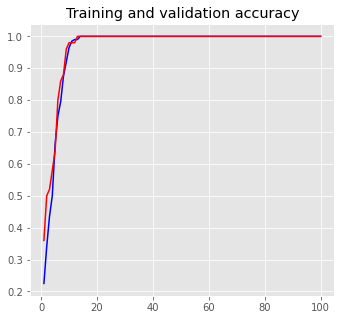

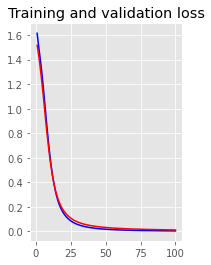

In [24]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.show()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.show()

plot_history(history)